# Project Part 1 - RateMyProfessor Analysis

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/eboyer221/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eboyer221/CS39AA-project/blob/main/project_part1.ipynb)


## 1. Introduction/Background

The majority, if not all, educational institutions employ student feedback as a means of evaluating their professors. This feedback typically comprises both ratings and open-ended comments from students. However, in most cases this information is kept confidential and isn't disclosed to either current or prospective students. RateMyProfessors.com (RMP) is one popular, publicly-available platform where students anonymously rate various facets of their instructors' performance, such as clarity, helpfulness, and easiness. Additionally, they can provide open-ended comments.

I would like to use this data to better understand what qualitative factors contribute to a professor's rating on RMP. The first goal is to determine whether automatic text classification can distinguish between professors with a high rating (>= 3.5) vs. professors with an average to low rating (< 3.5). I also want to examine student comments to isolate which factors are valued most by students, and whether differences emerge in those factors depending on the department the professor teaches in, as well as the gender of the professor.

The dataset used for this project is taken from https://data.mendeley.com/datasets/fvtfjyvw7d/2 and includes ratings and comments for 4406 unique professors. The data set scraped from RMP includes 18 variables. The variable that I am primarily focused on predicting is the star rating of the professor's overall quality, which each student provides along with their review, and which is also combined into an average overall score. According to RMP’s official standard, a rating of 3.5-5.0 is good, 2.5-3.4 is average and 1.0-2.4 is poor. The goal is to develop a model that can automatically analyze and understand the sentiment and content of the comments provided by each student in order to predict the corresponding star rating.

Dataset Citation:
He, Jibo (2020), “Big Data Set from RateMyProfessor.com for Professors' Teaching Evaluation”, Mendeley Data, V2, doi: 10.17632/fvtfjyvw7d.2


## 2. Exploratory Data Analysis

We will first clean the data set and perform exploratory data analysis to better understand its features.
The original data contains many single .csv files, with each file for a single professor's webpage from RMP. This requires some pre-processing. 


In [6]:
# import all of the python modules/packages you'll need here
import pandas as pd
from collections import Counter
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string
# ...

In [ ]:
First, the individual .csv files need to be combined into one merged_data.csv file.

In [7]:
"""
#code used on local machine to create the merged data set
folder_path = 'folder_path_name'
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Iterate through each file and concatenate it to the merged_data DataFrame
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, df], ignore_index=True)
#save the merged data to a new CSV file
    merged_data.to_csv('merged_data.csv', index=False)
"""

"\n#code used on local machine to create the merged data set\nfolder_path = 'folder_path_name'\nfile_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]\n\n# Initialize an empty DataFrame to store the merged data\nmerged_data = pd.DataFrame()\n\n# Iterate through each file and concatenate it to the merged_data DataFrame\nfor file in file_list:\n    file_path = os.path.join(folder_path, file)\n    df = pd.read_csv(file_path)\n    merged_data = pd.concat([merged_data, df], ignore_index=True)\n#save the merged data to a new CSV file\n    merged_data.to_csv('merged_data.csv', index=False)\n"

Let's look at the merged data set.

In [43]:
data_path = 'https://raw.githubusercontent.com/eboyer221/CS39AA-Project/main/merged_data.csv'
df_1 = pd.read_csv(data_path)
print(f"Shape: {df_1.shape}")
df_1.head()

Shape: (19685, 23)


,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,Robert Olshansky,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,0.0,3.5,NaN,2.0,NaN,...,3.5,2.0,NaN,NaN,NaN,NaN,NaN,0,0,"Good guy, laid back and interested in his fiel..."
1,Marshall Levett,Austin Community College,Counseling department,Austin,TX,2.0,5.0,NaN,1.0,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,such a fun professor. really helpful and knows...
2,Marshall Levett,Austin Community College,Counseling department,Austin,TX,2.0,5.0,NaN,1.0,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0,0,Such a easy class. It\'s simple. Do your homew...
3,Soazig Le Bihan,University of Montana - Missoula,Philosophy department,Missoula,MT,8.0,3.6,NaN,4.5,Tough Grader (2) Get ready to read (2) LOTS ...,...,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor..."
4,Soazig Le Bihan,University of Montana - Missoula,Philosophy department,Missoula,MT,8.0,3.6,NaN,4.5,Tough Grader (2) Get ready to read (2) LOTS ...,...,1.0,4.0,Mandatory,Yes,No,NaN,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...


A heatmap will help visualize how sparse the data is for each column. Yellow rows indicate missing or null values.

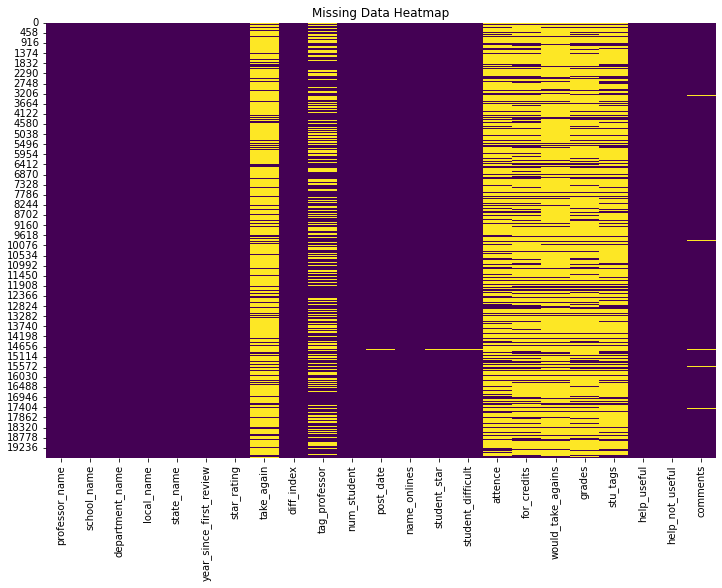

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Data Heatmap')
plt.show()

Judging from the heat map it appears that the columns of primary interest (department_name, star_rating, student_star_rating, and comments) are well-populated and do not contain many null values.

In [39]:
# number of nulls in comments column
blank_values_count = df_1['comments'].isnull().sum()
print(f"missing comments: {blank_values_count}")

# number of nulls in student_star rating column
blank_values_count = df_1['student_star'].isnull().sum()
print(f"missing ratings: {blank_values_count}")

missing comments: 101
missing ratings: 13


We can now remove columns that are not of interest.

In [45]:
# Columns to remove 
columns_to_remove = ['school_name', 'local_name', 'state_name',
                    'year_since_first_review', 'take_again', 'diff_index',
                    'tag_professor', 'post_date', 'name_onlines', 'attence',
                    'for_credits', 'would_take_agains', 'grades', 'stu_tags',
                    'help_useful', 'help_not_useful']

# Drop the specified columns
df = df_1.drop(columns=columns_to_remove)

print(df.columns)



Index(['professor_name', 'department_name', 'star_rating', 'num_student',
       'student_star', 'student_difficult', 'comments'],
      dtype='object')


In [46]:
df.head()

,professor_name,department_name,star_rating,num_student,student_star,student_difficult,comments
0,Robert Olshansky,Urban & Regional Planning department,3.5,1,3.5,2.0,"Good guy, laid back and interested in his fiel..."
1,Marshall Levett,Counseling department,5.0,2,5.0,1.0,such a fun professor. really helpful and knows...
2,Marshall Levett,Counseling department,5.0,2,5.0,1.0,Such a easy class. It\'s simple. Do your homew...
3,Soazig Le Bihan,Philosophy department,3.6,4,5.0,5.0,"A very hard class, and a massive amount of wor..."
4,Soazig Le Bihan,Philosophy department,3.6,4,1.0,4.0,Took 100 level class for Ethics offered online...
